In [1]:
import pandas as pd
import datetime
from pathlib import Path
from pandas.api.types import is_numeric_dtype

import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
class CONFIG():
    path_csv = Path('2021')
    random_state =42
    
cfg = CONFIG()

In [3]:
def read_df_info(path_csv):

    head_info = {}
    count = 0 
    with open(path_csv, 'r',  encoding = 'unicode_escape') as f:
        for line in f.readlines():
            if count == 8:
                break

            k, v = line.split(';')
            head_info[k] = v[:-1]
            count += 1

    df_info = pd.DataFrame([head_info])
    return df_info

def read_df_data(path_csv):
    df = pd.read_csv(path_csv, sep=';', encoding = 'unicode_escape', engine ='python', skiprows=8)
    return df

In [4]:
def load_df(cfg, samples=1):
    paths = []
    if os.path.isfile(cfg.path_csv):
        paths = [str(cfg.path)]
    else:
        paths = [str(f) for f in cfg.path_csv.glob('**/*.CSV') ]
        
    paths = pd.DataFrame(paths).sample(samples, random_state=42)
    dfs = []
    

# Concatenate all data into one DataFrame

    for path in paths.loc[:,0]:
        df_info = read_df_info(path)
        df_data = read_df_data(path)
        for column in df_info.columns:
            df_data.loc[:,column] = pd.Series([df_info[column].loc[0] for _ in range(len(df_data))])
        dfs.append(df_data)
    
    df_data = pd.concat(dfs, ignore_index=True)
    df_data = df_data.drop('Unnamed: 19', axis = 1)
    
    # Correção de tipos numericos
    for c_str in  df_data.columns[2:19].tolist() + df_data.columns[23:26].tolist():
        c = df_data[c_str]
        if is_numeric_dtype(c):# c.dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  :
            df_data.loc[:, [c_str]] = df_data[c_str].apply(np.float32)
        else:
            df_data.loc[:, [c_str]] = df_data[c_str].str.replace(',', '.')
            df_data.loc[:, [c_str]] = df_data[c_str].apply(lambda a: np.float32(pd.to_numeric(a)))
    
    # Correção de datas
    df_data.loc[:,'Data Hora'] = pd.to_datetime(df_data.Data.astype(str)+' '+ df_data['Hora UTC'].astype(str))
    df_data.loc[:,'DATA DE FUNDACAO:'] = pd.to_datetime(df_data['DATA DE FUNDACAO:'])
    df_data.loc[:,'Data'] = pd.to_datetime(df_data['Data'])
    df_data['timestamp'] = pd.to_datetime(df_data.Data.astype(str)+' '+ df_data['Hora UTC'].astype(str)).apply(lambda d: int(d.timestamp()))
    df_data.set_index('Data Hora',inplace=True)
    
    return df_data
    


In [5]:
df = load_df(cfg, samples=2)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11664 entries, 2021-01-01 00:00:00+00:00 to 2021-08-31 23:00:00+00:00
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   11664 non-null  datetime64[ns]
 1   Hora UTC                                               11664 non-null  object        
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       6576 non-null   float32       
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  7158 non-null   float32       
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        7158 non-null   float32       
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       7158 non-null   float32       
 6   RADIACAO GLOBAL (Kj/m²)                                3756 non-null   float32       
 7   TEMPERATURA DO AR - 

In [6]:
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,"VENTO, VELOCIDADE HORARIA (m/s)",REGIAO:,UF:,ESTACAO:,CODIGO (WMO):,LATITUDE:,LONGITUDE:,ALTITUDE:,DATA DE FUNDACAO:,timestamp
Data Hora,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,2021-01-01,0000 UTC,0.0,975.400024,975.400024,974.599976,NaN,28.700001,17.400000,28.900000,...,2.9,NE,PI,CANTO DO BURITI,A365,-8.117939,-42.975719,312.070007,2010-12-06,1609459200
2021-01-01 01:00:00+00:00,2021-01-01,0100 UTC,0.0,975.599976,975.599976,975.299988,NaN,26.600000,17.799999,28.700001,...,3.1,NE,PI,CANTO DO BURITI,A365,-8.117939,-42.975719,312.070007,2010-12-06,1609462800
2021-01-01 02:00:00+00:00,2021-01-01,0200 UTC,0.0,975.700012,975.700012,975.500000,NaN,25.799999,17.600000,27.500000,...,1.9,NE,PI,CANTO DO BURITI,A365,-8.117939,-42.975719,312.070007,2010-12-06,1609466400
2021-01-01 03:00:00+00:00,2021-01-01,0300 UTC,0.0,975.099976,975.799988,975.099976,NaN,24.299999,18.299999,25.799999,...,1.0,NE,PI,CANTO DO BURITI,A365,-8.117939,-42.975719,312.070007,2010-12-06,1609470000
2021-01-01 04:00:00+00:00,2021-01-01,0400 UTC,0.0,975.000000,975.200012,974.900024,NaN,23.799999,18.100000,25.299999,...,1.3,NE,PI,CANTO DO BURITI,A365,-8.117939,-42.975719,312.070007,2010-12-06,1609473600


Text(0, 0.5, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)')

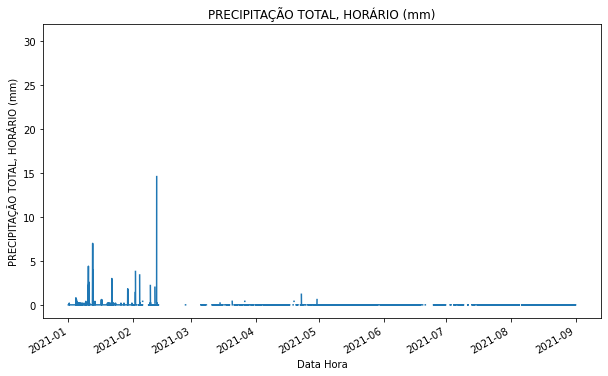

In [7]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].plot(figsize=(10,6),title='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)')
plt.ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm)')

## Aprendizado de máquina

In [8]:
df.columns

Index(['Data', 'Hora UTC', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'REGIAO:', 'UF:', 'ESTACAO:',
       'CODIGO (WMO):', 'LATITUDE:', 'LONGITUDE:', 'ALTITUDE:',
       'DATA DE FUNDACAO:', 'timest

In [9]:
# Remove and add columns
def preprocessing_begin(df):
    df_data = df.copy()
    
    df_data['hora']= df_data['Hora UTC'].apply(lambda s: np.float32(s.split(' ')[0])/100)
    df_data['mes']= df_data.Data.apply(lambda d: d.month)
    df_data['ano']= df_data.Data.apply(lambda d: d.year)
    df_data['dia']= df_data.Data.apply(lambda d: d.day)
    df_data['semana']= df_data.Data.apply(lambda d: d.week)
    df_data['choveu']= df_data['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].apply(lambda p: 1 if p > 0 else 0)
    
    df_data.drop(['Data', 'Hora UTC', 'REGIAO:', 'UF:', 'ESTACAO:',
       'CODIGO (WMO):', 'LATITUDE:', 'LONGITUDE:', 'ALTITUDE:',
       'DATA DE FUNDACAO:'], axis=1, inplace=True)
    
    return df_data
    
df_learn = preprocessing_begin(df)
df_learn.isnull().sum()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         5088
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    4506
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          4506
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         4506
RADIACAO GLOBAL (Kj/m²)                                  7908
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             4505
TEMPERATURA DO PONTO DE ORVALHO (°C)                     4527
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               4505
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               4505
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         4527
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         4527
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 4527
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 4527
UMIDADE RELATIVA DO AR, HORARIA (%)                      4526
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                     4506
VENTO, RAJADA MAXIMA (m/s)                               4506
VENTO, V

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df_learn_c = df_learn.fillna(-99999) # clean_dataset(df_learn)
X = df_learn_c.loc[:, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)':'semana']
y = df_learn_c.loc[:, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
y_class = df_learn.loc[:, 'choveu']

X_oversampled, y_oversampled = resample(X[y_class == 1],
                                        y[y_class == 1],
                                        replace=True,
                                        n_samples=X[y_class == 0].shape[0],
                                        random_state=cfg.random_state)

_, y_oversampled_class = resample(X[y_class == 1],
                                        y_class[y_class == 1],
                                        replace=True,
                                        n_samples=X[y_class == 0].shape[0],
                                        random_state=cfg.random_state)


X_balanced = np.vstack((X[y == 0], X_oversampled))
y_balanced = np.hstack((y[y == 0], y_oversampled))
y_balanced_class = np.hstack((y_class[y == 0], y_oversampled_class))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, stratify=y_balanced_class, test_size=0.25,  random_state=cfg.random_state)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_balanced, y_balanced_class, stratify=y_balanced_class, test_size=0.25,  random_state=cfg.random_state)

## Regressão

In [11]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn import svm

pipe = Pipeline([
    
    # ('imputer', SimpleImputer(missing_values=-10000, strategy='mean')),
    ('imputer', KNNImputer(missing_values=-99999, n_neighbors=10, weights="uniform")),
    
    # ('scaler', StandardScaler()), 
    ('scaler', MinMaxScaler()), 
    
    # ('select', SelectKBest(chi2, k=3)),
    
    # ('regression', LinearRegression())
    ('regression', svm.SVR())
])

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', KNNImputer(missing_values=-99999, n_neighbors=10)),
                ('scaler', MinMaxScaler()), ('regression', SVR())])

In [13]:
from sklearn.metrics import mean_absolute_error

y_pred = pipe.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.82806794300612

## Classificação

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

pipe = Pipeline([
    
    # ('imputer', SimpleImputer(missing_values=-10000, strategy='mean')),
    ('imputer', KNNImputer(missing_values=-99999, n_neighbors=10, weights="uniform")),
    
    # ('scaler', StandardScaler()), 
    ('scaler', MinMaxScaler()), 
    
    ('select', SelectKBest(chi2, k=5)),
    
    # ('regression', LinearRegression())
    ('classification', LogisticRegression())
])

In [15]:
pipe.fit(X_train_class, y_train_class)

Pipeline(steps=[('imputer', KNNImputer(missing_values=-99999, n_neighbors=10)),
                ('scaler', MinMaxScaler()),
                ('select',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7f457eb0bd30>)),
                ('classification', LogisticRegression())])

In [16]:
y_pred_class = pipe.predict(X_test_class)

Accuracy 0.8462917320188215


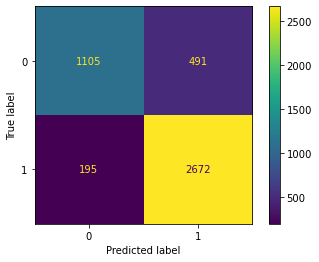

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print ("Accuracy", accuracy_score(y_test_class, y_pred_class))
plot_confusion_matrix(pipe, X_test_class, y_test_class)  
# confusion_matrix(y_test, y_pred)

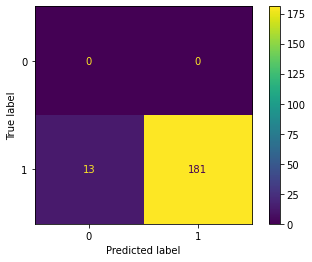

In [18]:
df_test = df_learn[df_learn['choveu']==1].fillna(-99999)
# df_test[:, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)':'semana']
X_df_test= df_test.loc[:, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)':'semana']
plot_confusion_matrix(pipe, X_df_test, df_test['choveu'])  